# Important: do this before starting on the project

**Double click here and enter the student numbers for all minigroup members. Don't enter any names.**
1. **First student number**
2. **Second student number**
3. **Third student number.**

Now **[click on this link and read the MATH0011 project instructions.](https://www.ucl.ac.uk/~ucahmto/0011/projectinstructions.html)**

This project is about implementing a simple version of the gradient descent algorithm, used for finding minimum values of multivariable functions. Gradient descent is commonly used in machine learning and AI and in statistics and optimization, so it's a good choice for anyone interested in those things.  You will also learn how to get good-looking 3D plots out of matplotlib.

# Project 4 - Gradient descent

Gradient ascent and descent are algorithms for finding [local minimums and maximums](https://www.mathsisfun.com/algebra/functions-maxima-minima.html) of a differentiable function of several variables.  In this project you will implement a simple version of gradient descent for functions $F : \mathbb{R}^2 \to \mathbb{R}$ and learn how to create 2D and 3D plots that demonstrate the behaviour of the algorithm using `matplotlib` and NumPy.

First we need some definitions. The **gradient** of a function $F : \mathbb{R}^2 \to \mathbb{R}$, written $\nabla F$, is the function $\nabla F : \mathbb{R}^2 \to \mathbb{R}^2$ given by 

$$ \nabla F (\mathbf{v}) = \begin{pmatrix} \frac{\partial F}{\partial x} (\mathbf{v}) \\ \frac{\partial F}{\partial y}(\mathbf{v})\end{pmatrix} $$

where $\frac{\partial F}{\partial x} (\mathbf{v})$ is the [partial derivative](https://en.wikipedia.org/wiki/Partial_derivative) defined by

$$ \frac{\partial F}{\partial x} (v_1, v_2) = \lim_{h\to 0} \frac{F(v_1+h, v_2) - F(v_1, v_2)}{h} $$ 

and $\frac{\partial F}{\partial y}$ is defined similarly.

For example, if $F(x, y) = xy + x^2 + 2y + 3$ then $\frac{\partial F}{\partial x} (x, y) = y + 2x$ and $\frac{\partial F}{\partial y}(x,y) = x + 2$ so $\nabla F (x, y) = \begin{pmatrix} y+2x \\ x+2 \end{pmatrix}$.

The significance of the gradient is that at a point $\mathbf{v} \in \mathbb{R}^2$, the direction in which $F$ increases fastest is $\nabla F( \mathbf{v})$ and the direction in which $F$ decreases fastest is $-\nabla F(\mathbf{v})$.  You'll learn more about this in the second part of MATH0011 methods 2.

This gives rise to a simple way of looking for a local maximum of a function $F: \mathbb{R}^2 \to \mathbb{R}$. Pick some point $\mathbf{a}_0$ to start off at, then move a small distance in the direction of $\nabla F( \mathbf{a}_0)$, taking you to a new point $\mathbf{a}_1$ with a bigger value of $F$, then move a small distance in the direction of $\nabla F(\mathbf{a}_1)$ to a new point $\mathbf{a}_2$, and so on. In some cases this actually works.  This is gradient ascent.  (To see how the method works, imagine you are standing somewhere on a foggy mountain and want to climb to the top.  If you keep walking in the steepest uphill direction you can find, you'll eventually get there, as long as there is only one peak).  To find a local minimum value of $F$ we can do the same thing except we move in the direction $- \nabla F$, since this is the direction in which $F$ decreases fastest - this is gradient *de*scent.

## Part 1 - approximating the gradient

In this part you will write a function to compute an approxiation to $\nabla f (\mathbf{a})$ where $f : \mathbb{R}^2 \to \mathbb{R}$.

**Write a function `approxGrad(f, v, h)` which returns an approximation to the gradient of the function `f` at the point `v` using a change in x and y of `h`.**

`f` will be a function of two variables and `v` will be a list `[a, b]` giving the coordinates of the point at which you will approximate the gradient of `f`.

**Your function must return a tuple of length 2** whose first element is an approximation to $\frac{\partial f}{\partial x}(a, b)$ computed using

$$ \frac{\partial f}{\partial x}(a, b) \approx \frac{f(a+h, b) - f(a, b)}{h} $$

and whose second element is an approximation to $\frac{\partial f}{\partial y}(a, b)$ computed using

$$ \frac{\partial f}{\partial y}(a, b) \approx \frac{f(a, b+h) - f(a, b)}{h}. $$

In [1]:
def approxGrad(f,v,h):
    f_a_b=f(v[0],v[1])
    first_element=(f(v[0]+h,v[1])-f_a_b)/h
    second_element=(f(v[0],v[1]+h)-f_a_b)/h
    return (first_element,second_element)

In the cell below, **check your approximation** for the function $F(x, y) = xy + x^2 + 2y + 3$ by comparing it to the partial derivatives given at the top of this notebook.  Try values of `x` and `y` between `-3` and `3` and experiment to see how `h` affects how close the approximation is to the true value.

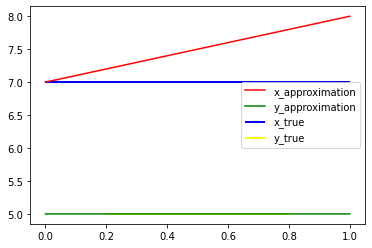

In [2]:
import random
import matplotlib.pyplot as plt
def F(x,y):
    return x*y+x**2+2*y+3
def F_partial_derivatives_x(x,y):
    return y+2*x
def F_partial_derivatives_y(x,y):
    return x+2
#generate random v[x,y] with -3<=x<=3 and -3<=y<=3
v=[]
for i in range(2):
    n=random.randint(-3,3)
    v.append(n)
x_true=F_partial_derivatives_x(v[0],v[1])
y_true=F_partial_derivatives_y(v[0],v[1])
#generate h from 0 to 10
h_list=[]
h=0.0000001
x_approximation=[]
y_approximation=[]
while h <=1:
    h_list.append(h)
    approximation=approxGrad(F,v,h)
    x_approximation.append(approximation[0])
    y_approximation.append(approximation[1])
    h+=0.000001
fig,ax = plt.subplots()
ax.plot(h_list,x_approximation, 'red', label="x_approximation")
ax.plot(h_list,y_approximation, 'green', label="y_approximation")
ax.hlines(y=x_true, xmin=0, xmax=1, linewidth=2, color='blue',label="x_true")
ax.hlines(y=y_true, xmin=0.2, xmax=0.8, linewidth=2, color='yellow',label="y_true")
plt.legend()

## Part 2 - the gradient descent algorithm

The gradient descent algorithm for a function $f : \mathbb{R}^2 \to \mathbb{R}$ that you are going to implement begins with a point $\mathbf{a}_0 \in \mathbb{R}^2$ and produces a sequence defined by

$$ \mathbf{a}_{i+1} \approx \mathbf{a}_i - k \nabla f (\mathbf{a}_i) $$

where $k$ is a fixed small positive number called the *step size*. The reason I have written $\approx$ and not $=$ is that you are going to use your function from Part 1 to use an approximation to the gradient of $f$ in place of the actual gradient.

**Write a function `gradientDescentSequence(f, a0, k, h, N)`** which behaves as follows.

 - `f` is a function of two variables
 - `a0` is a list of length 2 containing the x and y coordinates of the starting point of the gradient descent algorithm
 - `k` is the step size, as above
 - `h` is the change in x and y used to calculate an approximation to the gradient, which you will pass to your function from part 1
 - `N` is the number of terms of the gradient descent sequence to be calculated
 
**The output of your function must be a tuple of two lists of numbers**, the first list being the x-coordinates of the sequence $\mathbf{a}_0, \mathbf{a}_1, \ldots, \mathbf{a}_{N}$ and the second list being the y-coordinates.  This is so that you can use these lists in the `matplotlib.pyplot` plotting commands later.

The only difference between gradient ascent and gradient descent is that in gradient ascent you add on a small positive multiple of (an approximation of) the gradient. This means we can do gradient ascent by calling `gradientDescentSequence` with a negative value of `k`.

**Check your answer** by calculating the gradient descent sequence for the function $g(x, y) = x^2 + 2y^2$ starting at $(1, -1)$ with `N = 10`, `k = 0.2`, `h = 0.1`.  **Plot the points in the gradient descent sequence** using the `matplotlib.pyplot` function `plot` .  The function has its minimum at $(0, 0)$, so you should see the line tending towards the origin.

To make your plot look better, you may want to experiment with the `linewidth` parameter to the `plot` command

```python
plt.plot(xs, ys, 'r-', linewidth=0.5)
```
and to use `plt.xlim()` and `plt.ylim()` to control the range of x-coordinates and y-coordinates which are plotted. [This link](https://stackabuse.com/how-to-set-axis-range-xlim-ylim-in-matplotlib/) has some examples on the use of `xlim` and `ylim`.

In [ ]:
def g(x, y):
    return x**2 + 2*y**2

## Part 3 - 2D gradient plots and 3D plots

The plot from part 2 is not satisfying. It would be much better if we could see both the points of the gradient descent sequence and a visual representation of the function whose minimum we are looking for on the same axes, so that we can see what the gradient ascent/descent algorithm is doing.  But since we are working with functions $f : \mathbb{R}^2 \to \mathbb{R}$, we either have to do a 3D plot, or indicate the value of $f$ at the point $(x, y)$ in some way.  In this part you will use `matplotlib`'s `axes3d` to try 3D plotting and the functions `contour` and `contourf` to make a 2D plot that uses colours and contours to indicate the value of a function $f$ at the point $(x, y) \in \mathbb{R}^2$.

### Part 3.1: `contour` and `contourf`

Start by reading [the Wikipedia article on contour lines](https://en.wikipedia.org/wiki/Contour_line) until you understand what a contour plot is.

The `contour` function from `matplotlib.pyplot` is called similarly to the `plot` command, except that you must supply lists or numpy arrays of the x-coordinates, y-coordinates, and z-coordinates for your plot.  Luckily numpy has functions which make this a lot easier.  We will keep things by simple by choosing our x-coordinates and y-coordinates to be grid points on a rectangular grid - for example, if we choose x-values of 1, 2, 3 and y-values of 4, 5, 6 then the grid poins would be at (1, 4), (1, 5), (1, 6), (2, 4), (2, 5), (2, 6), (3, 4), (3, 5), (3, 6).

First we produce arrays of the x-values and y-values using `np.linspace`:

```python
x_grid_values = np.linspace(-5, 5, 100)
y_grid_values = np.linspace(-5, 5, 100)
```

The numpy function `meshgrid` will assemble these into arrays containing all of the x- and y-coordinates we need for the plot.

```python
xs, ys = np.meshgrid(x_grid_values, y_grid_values)
```

Finally we want to get the z-value for each of the gridpoints.  We could do this using some for loops, but again there is a numpy function to make it easy: if `g(x, y)` is a two-variable function which we want to apply to every one of our grid points, then `np.vectorize(g)` is a new function which can be applied to `xs` and `ys` to give the array of z-coordinates we need.

```python
zs = np.vectorize(g)(xs, ys)
```

Having prepared the x-, y-, and z-coordinates we can now just call `plt.contour(xs, ys, zs)` or `plt.contourf(xs, ys, zs)` to produce our contour plots.  You can experiment with `plt.contour(xs, ys, zs, levels=N)` where `N` is an integer to control how many contours are plotted.  Other ways to get the plot looking good are:

 - try `plt.axis('scaled')` to adjust scaling of the axes
 - calling `plt.colorbar()` shows how values of the function correspond to colours in the plot
 - read about colourmaps [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html) and then try `plt.contour(xs, ys, zs, levels=N, cmap=plt.get_cmap('turbo'))` for example.
 
**Following the instructions above, produce a `contour` or `contourf` plot of the function `g` defined below using values of `x` and `y` between -5 and 5.**  Include a colourbar in your plot, and experiment with parameter values to get the plot looking as good as possible.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

def g(x, y):
    return ((x**2 + y -11)**2 + (x+y**2 - 6)**2)

### Part 3.2: 3D plots with `axes3d`

To make 3D plots we have to create a `plt.figure()` object which we can then modify to show 3D plots.

```python
fig = plt.figure()
axes = fig.add_subplot(projection='3d')
```

The `axes` object has a method `plot_surface`, which takes lists of x-, y-, and z-coordinates exactly like `plt.contour` did in part 3.1.  You can also set the colour map just like before.

**Produce a 3D plot of the function `g` from part 3.1 using `plot_surface`.**

If you get errors related to 3D plotting, try importing the `axes3d` object:

```python
from mpl_toolkits.mplot3d import axes3d
```

## Part 4 - plotting gradient descent behaviour

### Part 4.1: gradient descent on a contour plot

Use `contourf` to plot the function `g` from Part 3.1. On the same plot, use `plot` to show the points generated by `gradientDescentSequence` starting at (0, -3), adjusting `h`, `k`, and `N` so that they converge to one of the local minima.  Indicate the starting point (0, -3) on the plot somehow.  Choose plotting colours and a colour map so that it is easy to see what is happening in the plot.

You should see the gradient descent sequence heading into one of the dark coloured holes on the plot (if you use the `turbo` colour map).

### Part 4.2: gradient descent on a 3D plot

Repeat the previous part except with a 3D plot. To draw a line on a 3D plot you need to use `axes.plot3D(xs, ys, zs)` where `xs`, `ys`, and `zs` are one-dimensional arrays of coordinates.  You will probably find that the line plot is very difficult to see against a `plot_surface`, so experiment using `plot_wireframe` instead of `plot_surface` and adjusting its `rstride` and `cstride` parameters. Alternatively you could use the following trick to produce a coloured wireframe plot with `plot_surface`:

```python
from matplotlib import cm

norm = plt.Normalize(zs.min(), zs.max())
colors = cm.twilight(norm(zs))

surface = ax.plot_surface(xs, ys, zs, facecolors=colors, shade=False)
surface.set_facecolor((0,0,0,0))
```

Aim at getting a plot where the 3D surface and the line showing the progress of the gradient descent algorithm are visible and easy to distinguish.

# Submitting your project

**Make sure you have done all of the following things.**

0. Included **all** minigroup members' student numbers at the top of this notebook.
1. Read through every part of the project to check you have answered all of it.
2. Carefully read and followed all of the [MATH0011 project instructions](https://www.ucl.ac.uk/~ucahmto/0011/projectinstructions.html).
3. Checked that all of your code works correctly.

If you have, you're ready to submit.  One minigroup member only should download the completed notebook (in CoCalc, click the File menu next to the green Save button, then click Download) and submit it on the MATH0011 Moodle.  Please submit **one .ipynb file per minigroup.**